In [2]:
def rgb_to_hex(rgb):
    """Convert RGB tuple to Hex string."""
    return '#{:02x}{:02x}{:02x}'.format(*rgb)

# Original RGB colors dictionary
colors_rgb = {
    "theme": (246, 244, 232),
    "entry": (231, 227, 216),
    "primary": (64, 119, 107),
    "secondary": (108, 108, 108),
    "tertiary": (214, 214, 214),
    "content": (31, 31, 31),
    "hljs-bg": (28, 29, 33),
    "code-bg": (246, 244, 232),
    "border": (62, 20, 82),
    "border-secondary": (64, 119, 107),
}

# Converting to Hex
colors_hex = {k: rgb_to_hex(v) for k, v in colors_rgb.items()}
colors_hex

{'theme': '#f6f4e8',
 'entry': '#e7e3d8',
 'primary': '#40776b',
 'secondary': '#6c6c6c',
 'tertiary': '#d6d6d6',
 'content': '#1f1f1f',
 'hljs-bg': '#1c1d21',
 'code-bg': '#f6f4e8',
 'border': '#3e1452',
 'border-secondary': '#40776b'}

[    2     0     0     2     1     5     9    12    14    18    29    39
    66   101   153   166   236   325   453   575   717  1072  1288  1658
  2066  2620  3227  4010  5028  5821  6964  8531  9916 11479 13472 15296
 17233 19376 21904 23677 26381 28033 30427 32291 33724 35585 36590 37568
 38257 38149 37879 37866 37083 35592 34337 32762 30662 28741 26424 24763
 22080 19763 17571 15960 13752 11807 10397  8935  7506  6177  5121  4274
  3522  2738  2154  1804  1380  1140   837   648   447   352   267   198
   131   109    88    52    40    22    19    11    10     5     4     1
     0     1     1     1] [-4.75868557 -4.66278861 -4.56689165 -4.47099469 -4.37509773 -4.27920077
 -4.18330381 -4.08740685 -3.99150989 -3.89561294 -3.79971598 -3.70381902
 -3.60792206 -3.5120251  -3.41612814 -3.32023118 -3.22433422 -3.12843726
 -3.0325403  -2.93664334 -2.84074638 -2.74484942 -2.64895246 -2.55305551
 -2.45715855 -2.36126159 -2.26536463 -2.16946767 -2.07357071 -1.97767375
 -1.88177679 -1.78587983 

Ellipsis

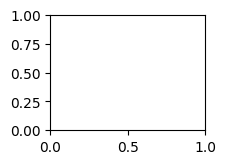

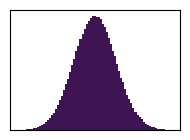

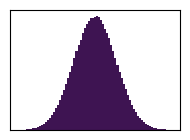

In [3]:
n=1000000
c=1
w=4

for T in [None, 0.1, 10]:
    # plot histograms of the data
    fig, ax = plt.subplots(1, 1, figsize=(2, 1.5))


    r = np.random.normal(0, 1, n)  # Normal distribution
    if T is not None:
        # temperature dependent softmax:
        # first, convert into probabilities using hist
        hist, bin_edges = np.histogram(r, bins=100)
        print(hist, bin_edges)
    else:
        continue


    ax.hist(r, bins=100, density=True, color=colors_hex['border'])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([-w,w])
    ax.set_title('', fontsize=16)

    plt.tight_layout()
    fig.savefig(f'normal{T}.png', dpi=300)
...

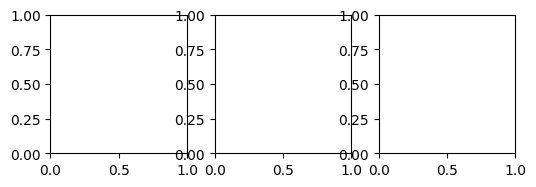

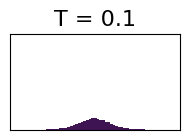

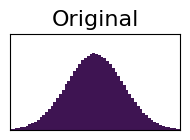

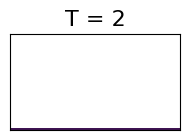

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

def temperature_softmax(hist, T):
    """Apply softmax with temperature T to histogram counts."""
    return softmax(hist / T)

# Colors dictionary (assuming colors_hex is already defined)
colors_hex = {
    # Add your colors_hex dictionary here
}

n = 1000000  # Number of data points
w = 3     # Window for x-axis limits

colors_hex = {k: rgb_to_hex(v) for k, v in colors_rgb.items()}
fig, axs = plt.subplots(1, 3, figsize=(2*3, 1.8))
for ax, T in zip(axs.flatten(), [0.1, None, 2]):
    fig, ax = plt.subplots(1, 1, figsize=(2, 1.5))

    r = np.random.normal(0, 1, n)  # Normal distribution
    if T is not None:
        # Temperature dependent softmax
        hist, bin_edges = np.histogram(r, bins=100, density=True)
        probabilities = temperature_softmax(hist, T)

        # Plot the transformed histogram
        ax.bar((bin_edges[:-1] + bin_edges[1:]) / 2, probabilities, width=(bin_edges[1] - bin_edges[0]), color=colors_hex['border'])
    else:
        # Plot the original histogram
        ax.hist(r, bins=100, density=True, color=colors_hex['border'])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, 0.5])
    ax.set_xlim([-w, w])
    ax.set_title(f'T = {T}' if T is not None else 'Original', fontsize=16)

    plt.tight_layout()
    fig.savefig(f'normal{T}.png', dpi=300)
# fig.savefig(f'normal.png', dpi=300)
